In [1]:
from doe_sampling import Space, Lhs, Path
import numpy as np
import pandas as pd
import logging

In [2]:


#def write_lhs_file(variable_ranges, samples, path, labels):
def write_lhs_file(doe_variables, samples, path):
    variable_constants = []
    variable_variables = []
    variable_ranges = doe_variables.values()
    labels=','.join(['ID'] + [key for key in doe_variables.keys()])
    
    for var in variable_ranges:
        if not isinstance(var, tuple):
            variable_constants.append(var)
        elif var[0] == var[1]:
            variable_constants.append(var[0])
        else:
            variable_variables.append(var)

    space = Space(variable_variables)
    lhs = Lhs(criterion="maximin", iterations=10000)
    x = lhs.generate(space.dimensions, samples)

    for xi in x:
        [xi.append(var) for var in variable_constants]

    p = Path(path)
    p.parent.mkdir(parents=True, exist_ok=True)
    with open(path, 'w') as f:
        f.write(f'{labels}\n')
        for i in range(len(x)):
            f.write(f'{i+1}')
            for j in range(len(np.array(x)[i,:])):
                f.write(f', {np.array(x)[i,j]}')
            f.write('\n')

    
    return 0


In [4]:
SAMPLES = 30
DATASET_ROOT = f'/home/ppiper/Dropbox/local/ihtc_repository/data/doe_lhs_multirun_30/'
DOEFILE = f'{DATASET_ROOT}doe_lhs.txt'

DOE_VARIABLES = {
                #'T0in' : (285.0, 1115.0),
                 'Thickness' : (0.001, 0.010),
                #'p0in': (0.5e6, 1e6),
                 'CP3_y': (-0.01255805, 0.0),
                 }

OTHER_PARAMS = {
                'Nx': 210,
                'Ny': 330,
                'tol': 1e-8,
                'cores': None,
                'inflationRate': 1.0015,
                'nozzle_shape': np.loadtxt('/home/ppiper/Dropbox/local/ihtc_repository/data/geometry/nozzle.txt', delimiter=','),
                'metal': 'AISI406',
                'itmaxSU2': 4_000,
                'rootfile': DATASET_ROOT, 
}

In [5]:
write_lhs_file(DOE_VARIABLES, SAMPLES, DOEFILE)

0

In [13]:
import pathlib

pathlib.Path('/home/ppiper/Dropbox/local/ihtc_repository/data/doe_lhs_multirun_test/1/SU2/inputs/cht_setupSU2.cfg').parents[0]

PosixPath('/home/ppiper/Dropbox/local/ihtc_repository/data/doe_lhs_multirun_test/1/SU2/inputs')

In [1]:
MASTER_FILE = '/home/ppiper/Dropbox/local/ihtc_repository/src/run_master.py'
with open(f'{MASTER_FILE}', 'r') as rf:
    lines = rf.readlines()

In [1]:
from gen_multi_runs import read_doe
import numpy as np


In [38]:
import configparser

class CaseConfigParser(configparser.ConfigParser):
    def optionxform(self, optionstr):
        return optionstr

config = CaseConfigParser()
config.read('/home/ppiper/Dropbox/local/ihtc_repository/src/single_configfile.cfg')

['/home/ppiper/Dropbox/local/ihtc_repository/src/single_configfile.cfg']

In [8]:
from run_models import single_run
from models import hf_model, lf_model
import numpy as np
import matplotlib.pyplot as plt

In [9]:
xr = np.loadtxt('/home/ppiper/Dropbox/local/ihtc_repository/data/geometry/nozzle.txt', delimiter=',' )

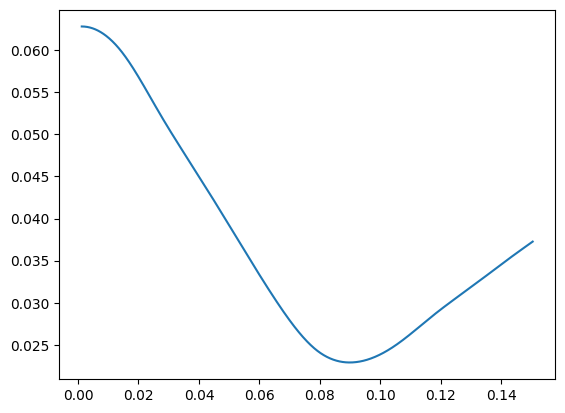

In [11]:
plt.plot(xr[:,0], xr[:,1])

In [45]:
ntimes = 5
plenum_width = 2
dx = xr[1,0]-xr[0,0]
N = xr[:,0].size
L = xr[-1,0]-xr[0,0]
x0 = xr[0,0]
xf = xr[-1,0]
r0 = xr[0,1]*plenum_width
rf = xr[-1,1]*plenum_width
downstream_x = np.linspace(x0 -ntimes*L, x0, ntimes*N)
downstream_r = np.ones_like(downstream_x)*r0
downstream = np.vstack((downstream_x, downstream_r)).T

upstream_x = np.linspace(xf, xf + ntimes*L, ntimes*N)
upstream_r = np.ones_like(upstream_x)*rf
upstream = np.vstack((upstream_x, upstream_r)).T


concat = np.concatenate((downstream, xr, upstream))

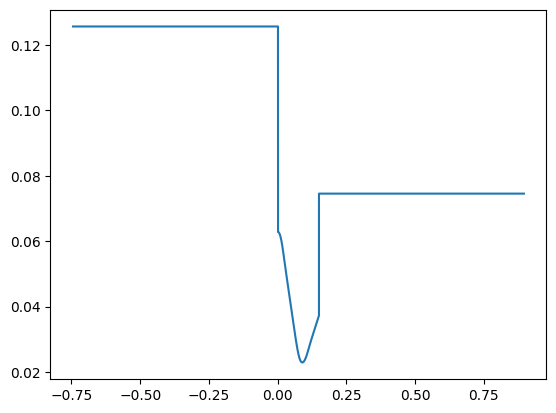

In [46]:
plt.plot(concat[:,0], concat[:,1])

In [2]:
single_run('single_configfile.cfg')

NameError: name 'single_run' is not defined

In [169]:
from bezier import find_control_points, bezier_curve

In [170]:
xr_cp = find_control_points(xr, n=5)

In [171]:
xr_cp.shape

(5, 2)

In [173]:
xr_bezier = bezier_curve(xr_cp, num_points=1000)

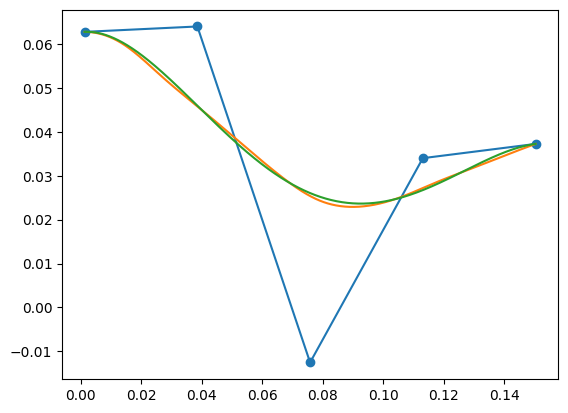

In [174]:
plt.plot(xr_cp[:,0],xr_cp[:,1], marker='o')
plt.plot(xr[:,0],xr[:,1])
plt.plot(xr_bezier[:,0], xr_bezier[:,1])

In [20]:
'./file.py'.replace(".","").replace("/","")

'filepy'

In [21]:
from /home/ppiper/Dropbox/local/ihtc_repository/src/models_parametric_shape.py

SyntaxError: invalid syntax (1298545408.py, line 1)

In [26]:
import pathlib

models_path = pathlib.Path('/home/ppiper/Documents/models_parametric_shape.py')

In [39]:
import configparser

class CaseConfigParser(configparser.ConfigParser):
    def optionxform(self, optionstr):
        return optionstr

config = CaseConfigParser()
config.read('/home/ppiper/Dropbox/local/ihtc_repository/src/configfile_parametric_shape.cfg')

['/home/ppiper/Dropbox/local/ihtc_repository/src/configfile_parametric_shape.cfg']

In [44]:
eval(config['HF_PARAMS']['CP3'])

[0.07579899, -0.01255805]

In [46]:
import numpy as np

In [47]:
xr_cp = np.array([  [ 0.00124464,  0.06280238],
                        [ 0.03852181,  0.06403152],
                        eval(config['HF_PARAMS']['CP3']),
                        [ 0.11307617,  0.03401363],
                        [ 0.15035334,  0.03725843]])

In [59]:
xr_cp = np.loadtxt('baselineCP.txt', delimiter=',')
xr_cp[2,:] = eval(config['HF_PARAMS']['CP3'])

: 

In [50]:
xr = bezier_curve(xr_cp, 1000)

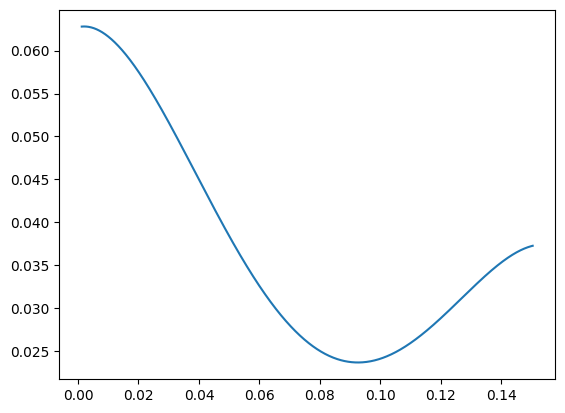

In [52]:
import matplotlib.pyplot as plt
plt.plot(xr[:,0],xr[:,1])

In [27]:
import os
models_path.relative_to(os.getcwd())

ValueError: '/home/ppiper/Documents/models_parametric_shape.py' is not in the subpath of '/home/ppiper/Dropbox/local/ihtc_repository/src' OR one path is relative and the other is absolute.